In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

from tqdm import tqdm as tqdm

import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

### Figure 1

In [2]:
# No code necessary. Created on BioRender.com.

### Figure 2


In [3]:
# Figure 2A was created using BioRender.com.

In [5]:
# Figure 2B

darkblue = "rgb(96,131,185)"
lightblue = "rgb(183,216,242)"
pink = "rgb(243,174,196)"

data = pd.read_csv("/Users/nicholasabad/Desktop/workspace/data/_DATA_FOR_PAPER_/pcawg_with_eopc_de_all_mutations_18March2025.csv")

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x = data[data["GENE"] == "TERT"]["num_recurrent_mutations"],
        y = data[data["GENE"] == "TERT"]["score"],
        mode = "markers",
        name = "TERT Mutations",
        marker_color=darkblue
    )
)

fig.add_trace(
    go.Scatter(
        x = data[(data["GENE"] != "TERT") & (data["num_recurrent_mutations"] > 0)]["num_recurrent_mutations"],
        y = data[(data["GENE"] != "TERT") & (data["num_recurrent_mutations"] > 0)]["score"],
        mode = "markers",
        name = "Non-TERT Recurrent Mutations",
        marker_color=lightblue
    )
)

fig.add_trace(
    go.Scatter(
        x = data[(data["GENE"] != "TERT") & (data["num_recurrent_mutations"] == 0)]["num_recurrent_mutations"],
        y = data[(data["GENE"] != "TERT") & (data["num_recurrent_mutations"] == 0)]["score"],
        mode = "markers",
        name = "Singletons",
        marker_color=pink
    )
)

fig.update_layout(
    yaxis_range = [40, 100],
    xaxis_range = [-1, 101],
    xaxis_title = "Number of Recurrent Mutations",
    yaxis_title = "REMIND-Cancer <br>Prioritization Score",
)

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    mirror=True,
    ticks='inside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)
    
fig.show()

In [6]:
%run /Users/nicholasabad/Desktop/workspace/phd-thesis/utils.ipynb

_write_figure_to_pdf(
    fig = fig,
    name_of_plot = "fig_2b",
    output_location = "/Users/nicholasabad/Desktop/workspace/REMIND-Cancer/paper_figures/grid/",
    overwrite=True
)


    _write_figure_to_pdf(
        fig: object,
        name_of_plot: str,
        notes: str="",
        output_location: str="/Users/nicholasabad/Desktop/workspace/phd-thesis/data/images",
        path_to_image_metadata_file: str="/Users/nicholasabad/Desktop/workspace/phd-thesis/data/images/metadata.json",
        overwrite: bool=False,
    )
    
Saving image to: /Users/nicholasabad/Desktop/workspace/REMIND-Cancer/paper_figures/grid/fig_2b.pdf


In [7]:
top100 = data.iloc[:100]
top100

,score,pid,cohort,#CHROM,POS,GENE,SEQUENCE_CONTEXT,REF,ALT,strand,...,destroyed_tfs_passing_tf_expression_threshold,num_remaining_tfs,remaining_tfs,"JASPAR2020_CORE_vertebrates_non_redundant(tf_name,binding_affinity,seq1,seq2,raw,zscore,log,tf_sequence_logo)","paths_with_recurrence(format=path,pid,cohort,bp,ref,alt,gene,chr,raw_score,zscore,log_score,confidence,purity,af,(tfs_seperated_by_//))",num_original_mutations,num_final_mutations,num_promoter_mutations,num_recurrent_mutations,cn_score
0,93.45,45a7949d-e63f-4956-866c-df51257032de,BLCA-US,2,71204529,ANKRD53,"GGGAAAGGGA,ACTCCCTTTC",G,A,+,...,NaN,2.0,"NFKB1,NFKB2","REL,13.2727,.,GGGAGTTTCC,0.298502304678,-1.254...",/omics/groups/OE0436/internal/nabad/results/16...,11050,76,284,5.0,3
1,93.41,6c884037-49f9-41c3-b0e5-9cbcd545aeb7,SKCM-US,9,91933357,SECISBP2,"CCGGCCGGAA,AAAGGGCGGG",G,A,+,...,"ELK4,ZBTB7A",2.0,"ELK1,ELK3","ELK1,0.10067117472187072,GCCGGAAGAA,.,14.99847...",/omics/groups/OE0436/internal/nabad/results/16...,40712,223,879,6.0,6
2,88.10,49dec0c2-8e75-4f44-a253-82b2ea605890,LUAD-US,2,71204529,ANKRD53,"GGGAAAGGGA,ACTCCCTTTC",G,A,+,...,NaN,2.0,"NFKB1,NFKB2","REL,13.2727,.,GGGAGTTTCC,1.13424410656,-0.0631...",/omics/groups/OE0436/internal/nabad/results/16...,22203,91,436,5.0,4
3,86.45,d692ecd0-2433-426b-9af2-a30c44a80f7c,THCA-US,5,1295228,TERT,"AGGGCCCGGA,GGGGCTGGGC",G,A,-,...,"SP8,TFAP2A,TFAP2C,CTCFL,MAZ,ZNF148",9.0,"TFAP2A,ELF1,ELF4,ETV6,KLF16,ZBTB7A,TFAP2B,TFAP...","TFAP2A,0.09557122923715045,GCCCCCTCCGGGCC,.,0....",/omics/groups/OE0436/internal/nabad/results/16...,1099,5,20,95.0,3
4,86.30,9988eb07-01f6-4f83-8699-bb63e0525f08,HNSC-US,7,145813786,CNTNAP2,"GCTGAGACTC,CCTGCCGCTC",C,A,+,...,ZNF148,2.0,"NHLH2,SNAI3","ZEB1,14.5102,.,CTCACCTGCCG,0.832158029939,-0.7...",.,23779,92,459,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,68.18,fa4d35e3-fc38-4e26-a9e0-521a648acec1,SKCM-US,17,37025887,LASP1,"TGGGCCGGAA,AGAGCTAAGA",G,A,+,...,"ZBTB7A,ETV5",5.0,"ELK1,ELK4,ELF1,ELK3,TFDP1","ELK1,0.09453761651761236,GCCGGAAGAG,.,26.41848...",.,42973,163,857,0.0,not_available
96,68.17,14630c19-9ee0-4ab3-9d8b-8c3309d1e7d0,SKCM-US,2,176957416,HOXD13,"ACCTGAACTT,GTTTTTATAA",C,T,+,...,NaN,0.0,NaN,"HNF4A,12.6099,.,AACAAAGTTCAGG,0.00344528497573...",/omics/groups/OE0436/internal/nabad/results/16...,24354,106,472,1.0,5
97,68.13,6c884037-49f9-41c3-b0e5-9cbcd545aeb7,SKCM-US,5,171433909,FBXW11,"CCGGGTTGTC,TTCCGGCTAG",C,T,-,...,"ELK4,ELF5,ZBTB7A,ELK3,ETV5",2.0,"ELK1,ELF4","ELK1,0.09513752128702038,GCCGGAAGGA,.,14.99847...",/omics/groups/OE0436/internal/nabad/results/16...,40712,223,879,3.0,4
98,68.11,760881cc-c623-11e3-bf01-24c6515278c0,LIRI-JP,2,47629535,MSH2,"CGTGAGCTAC,GCGCCCTGCC",C,A,+,...,"KLF2,KLF3,OSR1",2.0,"CTCFL,KLF15","CTCFL,0.7975471818008515,GGCAGGGCGCGG,GGCAGGGC...",.,184214,647,3397,0.0,not_available


In [8]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x = top100[top100["GENE"] == "TERT"].index,
        y = top100[top100["GENE"] == "TERT"]["score"],
        name = "TERT Mutations",
        marker_color = darkblue
    )
)

fig.add_trace(
    go.Bar(
        x = top100[(top100["GENE"] != "TERT") & (top100["num_recurrent_mutations"] > 0)].index,
        y = top100[(top100["GENE"] != "TERT") & (top100["num_recurrent_mutations"] > 0)]["score"],
        name = "Non-TERT Mutations",
        marker_color = lightblue
    )
)
fig.add_trace(
    go.Bar(
        x = top100[(top100["num_recurrent_mutations"] == 0)].index,
        y = top100[(top100["num_recurrent_mutations"] == 0)]["score"],
        name = "Singletons",
        marker_color = pink
    )
)

fig.update_layout(
    plot_bgcolor='white'
)

fig.update_xaxes(
    mirror=True,
    ticks='inside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)

fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    linewidth=1
)
    


fig.update_layout(
    yaxis_range = [50, 100],
    xaxis_range = [0, 100]
)

In [9]:
_write_figure_to_pdf(
    fig = fig,
    name_of_plot = "fig_2c",
    output_location = "/Users/nicholasabad/Desktop/workspace/REMIND-Cancer/paper_figures/grid/",
    overwrite=True
)

Saving image to: /Users/nicholasabad/Desktop/workspace/REMIND-Cancer/paper_figures/grid/fig_2c.pdf


### Figure 3
Sample of interest: "54a77010-2f16-4da9-8ca0-746a51801a00"

In [59]:
skcm_us_fpkm = pd.read_csv("./data/skcm_us_fpkm.csv")
skcm_us_fpkm.set_index("Patient_ID", inplace=True)

In [60]:
skcm_us_fpkm.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC099676.1,AL391069.4,AL354760.1,OR6R2P,AL139339.2,AC096992.2,AC104836.1,AC008264.2,AP000229.1,AC098479.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
41a7b031-d928-4a1f-891b-82fb3f6d548f,9.165695,0.043181,25.452836,1.870490,4.356859,0.446267,0.651338,29.333235,8.868660,26.192349,...,0.338613,0.216803,0.151369,0.000000,0.063490,0.586227,0.005377,0.029814,0.000000,0.270863
fe8c62a6-c113-46e8-ab91-fdb90bb6a59f,9.325312,0.149001,25.713349,2.655871,3.366440,1.142260,1.536636,23.468102,6.547917,31.869656,...,0.912831,0.041561,0.217631,0.033318,0.060855,0.830979,0.015461,0.042865,0.039121,0.389435
affa4ef4-02ec-40f1-b6a2-739f8bf2afa9,23.496141,0.010078,17.784702,3.086497,2.575270,0.756622,31.760362,30.866657,1.840522,15.808113,...,0.666795,0.168663,0.693930,0.000000,0.012348,0.775618,0.075292,0.104371,0.023814,0.474117
d056645f-4dd3-49f3-b0a4-2293e2b4d82c,9.488670,0.000000,14.466627,1.524463,1.572170,0.220588,1.030022,18.918524,4.774886,21.939470,...,0.458228,0.056900,0.085128,0.000000,0.000000,0.438809,0.074084,0.000000,0.013390,0.177719
22edd867-dcd6-42b5-92bb-025ceb84b106,11.896131,0.000000,38.450823,4.029386,3.804210,8.096825,3.123636,27.532646,2.118178,11.168947,...,0.913442,0.069315,0.311110,0.000000,0.084578,0.613753,0.034381,0.038723,0.010874,0.144332


In [62]:
skcm_us_zscore_dataframe = zscore(skcm_us_fpkm, axis=0)
skcm_us_zscore_dataframe.head()

,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,NFYA,...,AC099676.1,AL391069.4,AL354760.1,OR6R2P,AL139339.2,AC096992.2,AC104836.1,AC008264.2,AP000229.1,AC098479.1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
41a7b031-d928-4a1f-891b-82fb3f6d548f,-0.616566,-0.160174,-0.102196,-0.655151,2.402502,-0.960685,-0.634873,-0.099984,1.776795,0.592579,...,-0.626517,3.440278,-0.806529,-0.369732,0.092746,-0.321930,-0.681879,-0.064549,-0.277357,-0.038446
fe8c62a6-c113-46e8-ab91-fdb90bb6a59f,-0.603488,-0.104566,-0.074833,0.304953,1.331883,-0.644332,-0.569961,-0.459094,0.848429,1.102465,...,0.777877,0.040096,-0.589575,1.515403,0.045979,0.315596,-0.560290,0.182835,-0.213340,0.398805
affa4ef4-02ec-40f1-b6a2-739f8bf2afa9,0.557617,-0.177570,-0.907615,0.831380,0.476648,-0.819618,1.646130,-0.006096,-1.034670,-0.340042,...,0.176135,2.506217,0.969906,-0.369732,-0.815071,0.171392,0.161110,1.348696,-0.238388,0.711084
d056645f-4dd3-49f3-b0a4-2293e2b4d82c,-0.590103,-0.182866,-1.256127,-1.078158,-0.607678,-1.063264,-0.607107,-0.737654,0.139163,0.210623,...,-0.333970,0.337700,-1.023413,-0.369732,-1.034260,-0.705920,0.146547,-0.629669,-0.255446,-0.381931
22edd867-dcd6-42b5-92bb-025ceb84b106,-0.392845,-0.182866,1.263041,1.984032,1.805102,2.516759,-0.453597,-0.210230,-0.923599,-0.756691,...,0.779371,0.578599,-0.283511,-0.369732,0.467076,-0.250232,-0.332169,0.104332,-0.259563,-0.505050


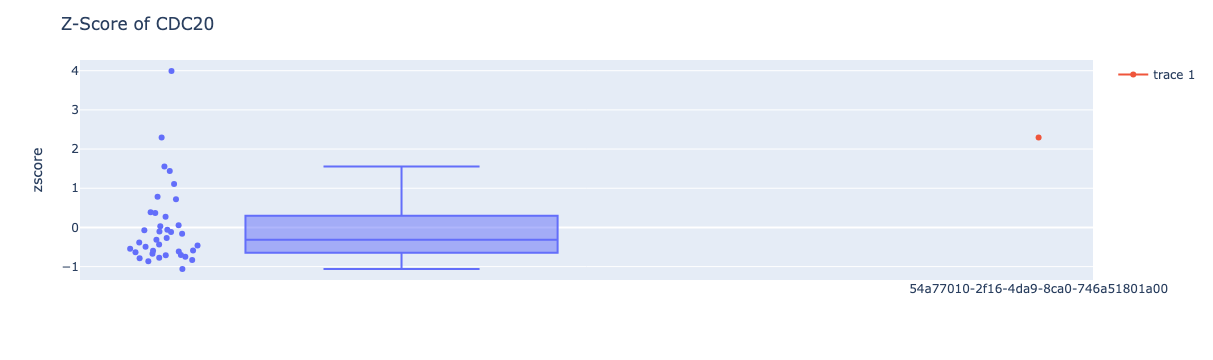

In [72]:
fig = px.box(skcm_us_zscore_dataframe, y="CDC20", points="all")
fig.update_layout(
    title = "Z-Score of CDC20",
    yaxis_title = "zscore",
)

fig.add_trace(
    go.Scatter(
        y = [skcm_us_zscore_dataframe.loc["54a77010-2f16-4da9-8ca0-746a51801a00", "CDC20"]],
        x = ["54a77010-2f16-4da9-8ca0-746a51801a00"]
    )
)

fig.show()

In [74]:
# Figures 3C-3F were generated from pSNV Hunter: https://github.com/nicholas-abad/pSNV-hunter

In [2]:
data = pd.read_csv("/Users/nicholasabad/Desktop/workspace/data/_DATA_FOR_PAPER_/top1000_pSNVs.csv")
data[data["GENE"].isin(["TERT", "ANKRD53", "PRDM2"])].to_csv("/Users/nicholasabad/Desktop/workspace/data/_DATA_FOR_PAPER_/gtp.csv", index=False, sep=",")